In [2]:
print('test')

test


import model, define global params.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

alpha = 0.1   # learning rate, gradient descent
iteration_times = 100   # iteration times

load house dataset, and print its shape

In [2]:
house = load_svmlight_file('E:/Master/personal/实验和作业/机器学习/data/housing_scale.svm')
print('house data shape:', house[0].shape, '----label shape:', house[1].shape)

house data shape: (506, 13) ----label shape: (506,)


split data into train and test, train size is 80%

In [3]:
x_train, x_test, y_train, y_test = train_test_split(house[0], house[1], train_size=0.8, test_size=0.2)
print('train data shape:', x_train.shape)
print('test data shape:', x_test.shape)

train data shape: (404, 13)
test data shape: (102, 13)


linear model, initial params random, weight matrix and bias term
- attention: w * b's shape is equal to b's shape.

In [4]:
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
print('weight shape:', w.shape)

weight shape: (13,)


iteration model
- using linear model and square loss function.
- gradient descent, compute and update the gradient of weight and bias.
- comput loss of test data

In [5]:
train_total_loss = []    # train loss value
test_total_loss = []    # test loss value
for i in range(iteration_times):
    y_pred = x_train*w + b
    loss_train = 0.5*np.linalg.norm(y_pred - y_train)    # square loss function of train data
    y_test_pred = x_test*w + b
    loss_test = 0.5*np.linalg.norm(y_test_pred - y_test)    # square loss function of test data
    train_total_loss.append(loss_train)    # add list
    test_total_loss.append(loss_test)
    if i % 10 == 0:  # print info each 100
        print('i:', i, 'current train loss:', loss_train, 'current test loss:', loss_test)
    # update w and b
    w = w - alpha*(y_pred - y_train)*x_train/y_train.shape[0]
    b = b - alpha*np.mean(y_pred - y_train)

i: 0 current train loss: 233.832078947 current test loss: 118.63219808
i: 10 current train loss: 73.7345295187 current test loss: 44.1158398649
i: 20 current train loss: 66.9449807707 current test loss: 40.2844073807
i: 30 current train loss: 61.9943907948 current test loss: 37.2803629114
i: 40 current train loss: 58.3264828336 current test loss: 34.9361854498
i: 50 current train loss: 55.5998395182 current test loss: 33.1180322261
i: 60 current train loss: 53.5650860262 current test loss: 31.7143072591
i: 70 current train loss: 52.0384215783 current test loss: 30.6341768245
i: 80 current train loss: 50.8846162411 current test loss: 29.8045432058
i: 90 current train loss: 50.0045291941 current test loss: 29.1673139371


draw the pic of train and test loss with different iteration times

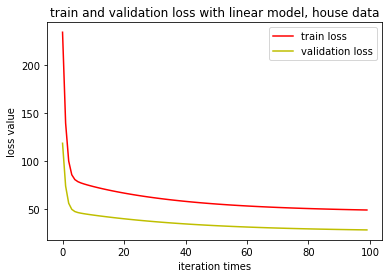

In [6]:
# train loss plt
plt.figure()
plt.title('train and validation loss with linear model, house data')
plt.plot(range(len(train_total_loss)), train_total_loss, color='r', label='train loss')
# test loss plt
plt.plot(range(len(test_total_loss)), test_total_loss, color='y', label='validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.legend()
plt.show()

load australian dataset, and print its shape
split data into train and test, train size is 80%

In [7]:
australian = load_svmlight_file('E:/Master/personal/实验和作业/机器学习/data/australian_scale.svm')
print('australian data shape:', australian[0].shape, '----label shape:', australian[1].shape)
x_train, x_test, y_train, y_test = train_test_split(australian[0], australian[1], train_size=0.8, test_size=0.2)
print('train data shape:', x_train.shape)
print('test data shape:', x_test.shape)

australian data shape: (690, 14) ----label shape: (690,)
train data shape: (552, 14)
test data shape: (138, 14)


linear classification, use svm model
initial params random, weight matrix and bias term

In [8]:
lamb = 0.1 
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
print('weight matrix shape:', w.shape)

weight matrix shape: (14,)


iteration model
- using svm model, hinge loss. comput loss of train and validation data
- gradient descent, compute and update the gradient of weight and bias.

In [9]:
train_total_loss = []    # train loss value
test_total_loss = []    # test loss value
for i in range(iteration_times):
    hinge_temp = 1 - y_train*(x_train*w + b)
    hinge_temp[hinge_temp < 0] = 0
    loss_train = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)    # hinge loss function of train data
    
    hinge_temp = 1 - y_test*(x_test*w + b)
    hinge_temp[hinge_temp < 0] = 0
    loss_test = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)    # hinge loss function of test data

    train_total_loss.append(loss_train)    # add list
    test_total_loss.append(loss_test)
    
    if i % 10 == 0:  # print info each 100
        print('i:', i, 'current train loss:', loss_train, 'current test loss:', loss_test)
        
    # update w and b
    # w_delta = alpha*y_train*x_train
    for j in range(x_train.shape[0]):
        if y_train[j]*(x_train[j]*w + b) < 1:
            w = w + (alpha*y_train[j]*x_train[j]).toarray()[0]
            b = b + alpha*y_train[j] 

i: 0 current train loss: 1432.00023636 current test loss: 334.590353421
i: 10 current train loss: 177.686635281 current test loss: 71.6771985809
i: 20 current train loss: 168.880690226 current test loss: 69.8340566491
i: 30 current train loss: 178.509165123 current test loss: 69.0931697325
i: 40 current train loss: 173.275564967 current test loss: 67.0172920166
i: 50 current train loss: 169.068096628 current test loss: 69.6851177794
i: 60 current train loss: 178.645826006 current test loss: 68.3692664697
i: 70 current train loss: 171.025923846 current test loss: 67.7199454195
i: 80 current train loss: 182.778999241 current test loss: 72.9519612785
i: 90 current train loss: 184.402115298 current test loss: 69.9885252596


draw the pic of train and test loss with different iteration times

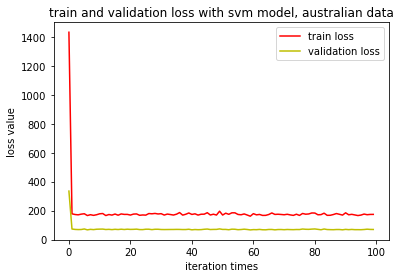

In [10]:
# train loss plt
plt.figure()
plt.title('train and validation loss with svm model, australian data')
plt.plot(range(len(train_total_loss)), train_total_loss, color='r', label='train loss')
# test loss plt
plt.plot(range(len(test_total_loss)), test_total_loss, color='y', label='validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.legend()
plt.show()